**Import libraries**

In [112]:
#@title
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import tensorflow as tf
from scipy.stats import pointbiserialr
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import regularizers, layers, optimizers, callbacks, activations
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier


**Load data**

In [147]:
#@title
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

# Exploratory Data Analysis (EDA)

In [190]:
#@title
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
13,0,3,male,39.0,1,5,31.2750,S
20,0,2,male,35.0,0,0,26.0000,S
23,1,1,male,28.0,0,0,35.5000,S
25,1,3,female,38.0,1,5,31.3875,S
30,0,1,male,40.0,0,0,27.7208,C


In [191]:
#@title
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
7,2,male,26.00000,1,1,29.0000,S
9,3,male,21.00000,2,0,24.1500,S
15,2,female,24.00000,1,0,27.7208,C
22,1,female,30.27259,0,0,31.6833,S
28,1,male,41.00000,0,0,30.5000,S


In [192]:
#@title
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 13 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  112 non-null    int64  
 1   Pclass    112 non-null    int64  
 2   Sex       112 non-null    object 
 3   Age       112 non-null    float64
 4   SibSp     112 non-null    int64  
 5   Parch     112 non-null    int64  
 6   Fare      112 non-null    float64
 7   Embarked  112 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 7.9+ KB


**Investige class imbalance between survived and not survived**

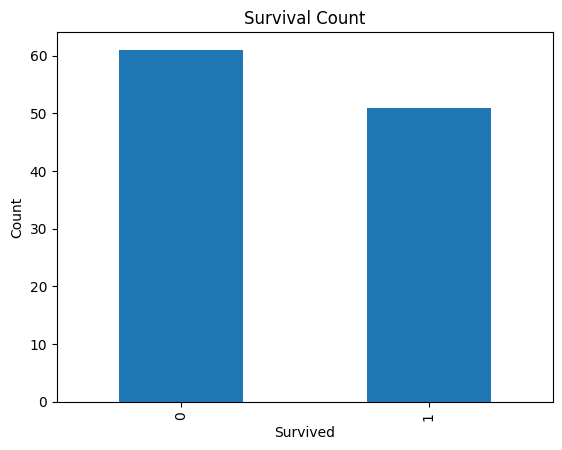

In [193]:
#@title
survived_counts = train['Survived'].value_counts()

# Plot the bar chart
survived_counts.plot(kind='bar')

# Set the chart title and axes labels
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

# Display the chart
plt.show()

**Investigate correlation of age and fare with survivors and non survivors**

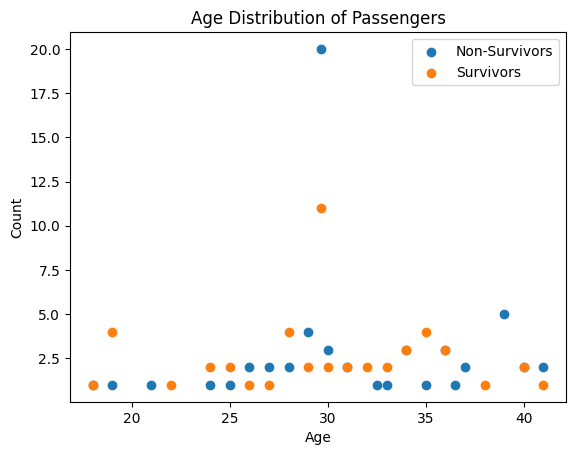

In [194]:
#@title
survived = train[train['Survived'] == 1]
survived_counts = survived['Age'].value_counts()
ages = survived_counts.index
count = survived_counts.values

nsurvived = train[train['Survived'] == 0]
nsurvived_counts = nsurvived['Age'].value_counts()
nages = nsurvived_counts.index
ncount = nsurvived_counts.values

# Plot the scatter plot
plt.scatter(nages, ncount, label='Non-Survivors')
plt.scatter(ages, count, label='Survivors')

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()
plt.show()

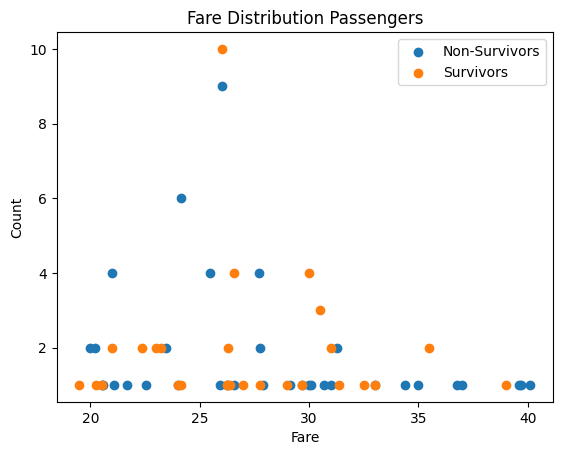

In [195]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived_counts = nsurvived['Fare'].value_counts()
nfares = nsurvived_counts.index
ncount = nsurvived_counts.values

survived = train[train['Survived'] == 1]
survived_counts = survived['Fare'].value_counts()
fares = survived_counts.index
count = survived_counts.values

# Plot the scatter plot
plt.scatter(nfares, ncount, label='Non-Survivors')
plt.scatter(fares, count, label='Survivors')

plt.title('Fare Distribution Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()

plt.show()
plt.show()

**Investigation of correlation of categorical features (sex, pclass, embarked)**

**Sex**

<Axes: >

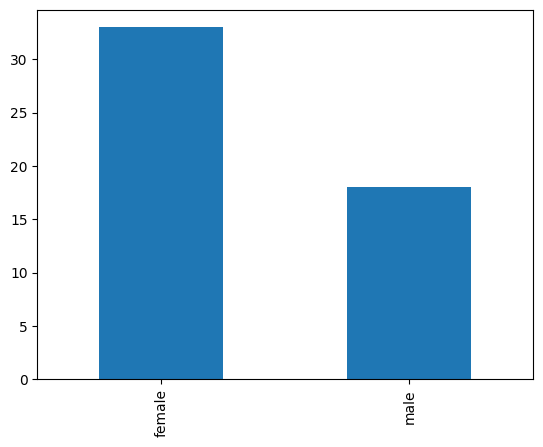

In [196]:
#@title
survived = train[train['Survived'] == 1]
survived = survived['Sex'].value_counts()
survived.plot(kind='bar')

<Axes: >

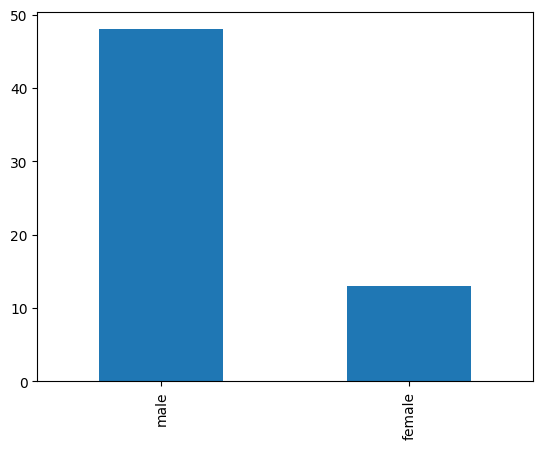

In [197]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived = nsurvived['Sex'].value_counts()
nsurvived.plot(kind='bar')

**Pclass**

<Axes: >

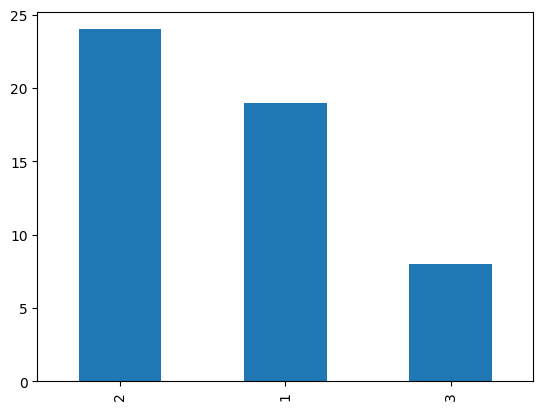

In [198]:
#@title
survived = train[train['Survived'] == 1]
survived = survived['Pclass'].value_counts()
survived.plot(kind="bar")

<Axes: >

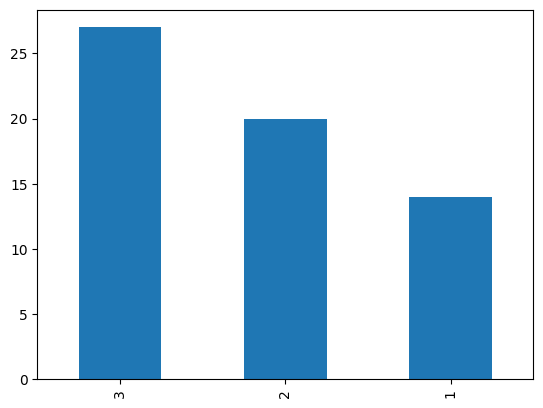

In [199]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived = nsurvived['Pclass'].value_counts()
nsurvived.plot(kind="bar")

**Embarked**

<Axes: >

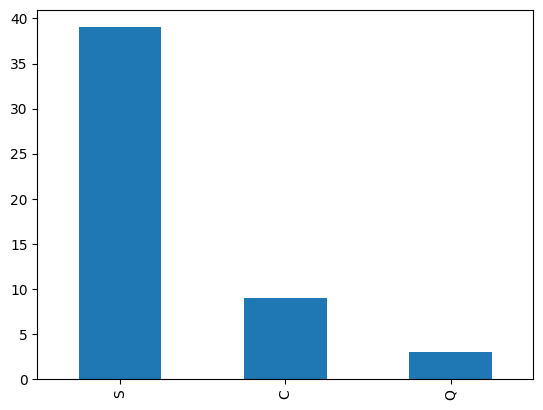

In [200]:
#@title
survived = train[train['Survived'] == 1]
survived_embarked = survived['Embarked'].value_counts()
survived_embarked.plot(kind="bar")

<Axes: >

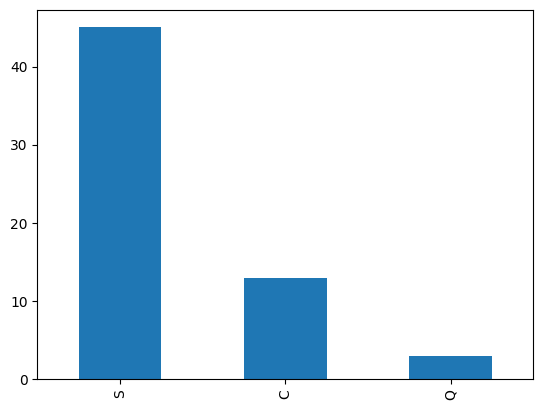

In [201]:
#@title
nsurvived = train[train['Survived'] == 0]
nsurvived_embarked = nsurvived['Embarked'].value_counts()
nsurvived_embarked.plot(kind="bar")

**Feature combinations (sex and pclass)**

<Axes: xlabel='Sex,Pclass'>

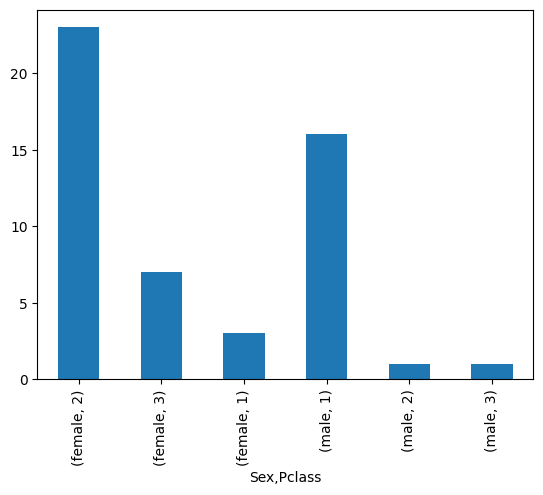

In [202]:
#@title
survived = train[train['Survived'] == 1]
survived = survived.groupby('Sex')['Pclass'].value_counts()
survived.plot(kind='bar')

<Axes: xlabel='Sex,Pclass'>

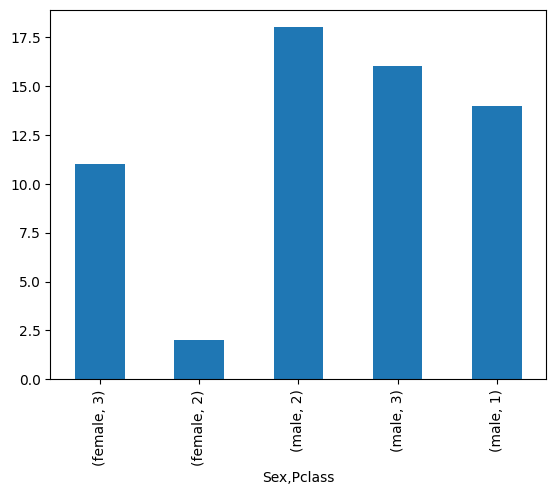

In [203]:
#@title
survived = train[train['Survived'] == 0]
survived = survived.groupby('Sex')['Pclass'].value_counts()
survived.plot(kind='bar')

**Missing Data Analysis**

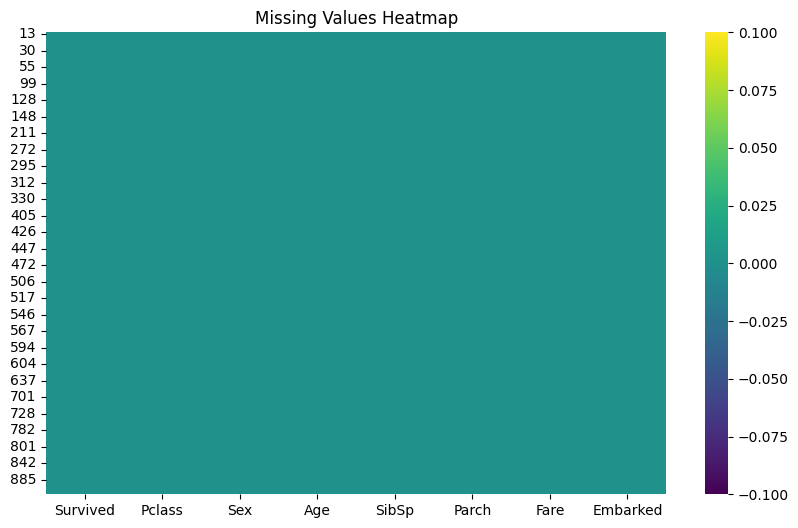

In [204]:
#@title
missing_values_count = train.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count > 0].index

plt.figure(figsize=(10, 6))
sn.heatmap(train.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [205]:
#@title
pearson_corr = train['Age'].corr(train['Fare'])
#point_biserial_corr, p_value = pointbiserialr(train['Sex'], train['Pclass'])

#print("Point-biserial correlation coefficient:", point_biserial_corr)
#print("p-value:", p_value)
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.0645139879947515


<Axes: >

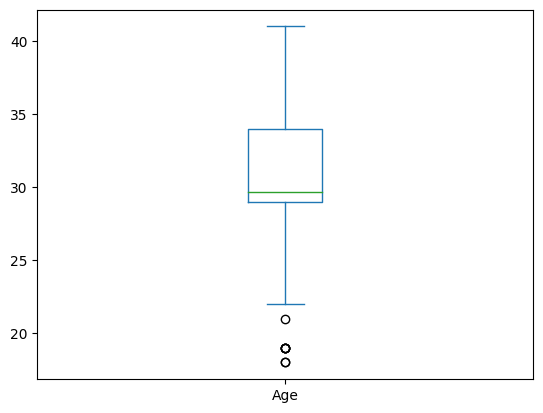

In [206]:
#@title
age_data = train['Age']
age_data.plot(kind='box')

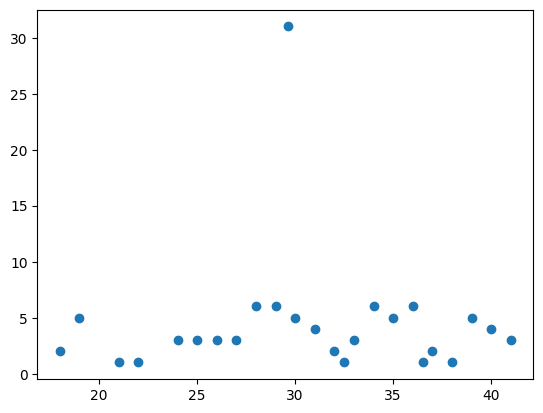

In [207]:
#@title
survived_counts = train['Age'].value_counts()
ages = survived_counts.index
count = survived_counts.values

plt.scatter(ages, count, label='Survivors')

# Feature Engineering/Preprocessing

**Preprocessing: Handle missing values**


In [141]:
# drop 'Cabin' column
train = train.drop('Cabin', axis='columns')
test = test.drop('Cabin', axis='columns') 

# drop two rows of Embarked 
train = train.drop(train[train['Embarked'].isnull() == True].index, axis="index") 
test = test.drop(test[test['Embarked'].isnull() == True].index, axis="index") 

# Impute missing values with mean
train_age = train[train['Age'].notna()]['Age'] 
train_age_mean = train_age.mean()
train['Age'].fillna(train_age_mean, inplace=True)

test_age = test[test['Age'].notna()]['Age'] 
test_age_mean = test_age.mean()
test['Age'].fillna(test_age_mean, inplace=True)

# drop unnecessary columns
train = train.drop(['PassengerId', 'Ticket', 'Name'], axis='columns')
test = test.drop(['PassengerId', 'Ticket', 'Name'], axis='columns')

In [131]:
# drop outliers
def remove_outliers(df, column, threshold=0.9):
    z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
    outliers = np.abs(z_scores) > threshold  # Identify outliers
    df_no_outliers = df[~outliers]  # Filter out outliers
    return df_no_outliers

def handle_outliers_winsorize(df, column, lower_limit=0.05, upper_limit=0.95):
    df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))
    return df

train = remove_outliers(train, 'Age')
test = remove_outliers(test, 'Age')

train = handle_outliers_winsorize(train, 'Fare')
test = handle_outliers_winsorize(test, 'Fare')

<ipython-input-131-7c16307dee55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = winsorize(df[column], limits=(lower_limit, upper_limit))


**Feature Engineering**

In [142]:
# convert 'Sex' values to binary
train['Sex_male'] = (train['Sex'] == 'male').astype(int)
train['Sex_female'] = (train['Sex'] == 'female').astype(int)

test['Sex_male'] = (test['Sex'] == 'male').astype(int)
test['Sex_female'] = (test['Sex'] == 'female').astype(int)

# one-hot encoding 'Embarked' column
train['EmbarkedS'] = ((train['Embarked'] == 'S')).astype(int)
train['EmbarkedC'] = ((train['Embarked'] == 'C')).astype(int)
train['EmbarkedQ'] = ((train['Embarked'] == 'Q')).astype(int)

test['EmbarkedS'] = ((test['Embarked'] == 'S')).astype(int)
test['EmbarkedC'] = ((test['Embarked'] == 'C')).astype(int)
test['EmbarkedQ'] = ((test['Embarked'] == 'Q')).astype(int)

# one-hot encoding 'Age' column
train['Age_child'] = ((train['Age'] >= 0) & (train['Age'] <= 10)).astype(int)
train['Age_adult'] = ((train['Age'] >= 11) & (train['Age'] <= 50)).astype(int)
train['Age_elderly'] = ((train['Age'] >= 51)).astype(int)

test['Age_child'] = ((test['Age'] >= 0) & (test['Age'] <= 10)).astype(int)
test['Age_adult'] = ((test['Age'] >= 11) & (test['Age'] <= 40)).astype(int)
test['Age_elderly'] = ((test['Age'] >= 41)).astype(int)

# one-hot encoding 'Fare' column
train['Fare_cheap'] = ((train['Fare'] >= 0) & (train['Fare'] <= 50)).astype(int)
train['Fare_budget'] = ((train['Fare'] >= 51) & (train['Fare'] <= 300)).astype(int)
train['Fare_expensive'] = ((train['Fare'] >= 301)).astype(int)

test['Fare_cheap'] = ((test['Fare'] >= 0) & (test['Fare'] <= 50)).astype(int)
test['Fare_budget'] = ((test['Fare'] >= 51) & (test['Fare'] <= 300)).astype(int)
test['Fare_expensive'] = ((test['Fare'] >= 301)).astype(int)

# drop unnecessary columns
train = train.drop(['Embarked', 'Sex'], axis='columns')
test = test.drop(['Embarked', 'Sex'], axis='columns')

In [143]:
# scaling 'Age' and 'Fare'  columns
scaler = MinMaxScaler()
fare_values = train['Fare'].values.reshape(-1, 1)
age_values = train['Age'].values.reshape(-1, 1)

scaled_fare = scaler.fit_transform(fare_values)
scaled_age = scaler.fit_transform(age_values)

train['Fare'] = scaled_fare
train['Age'] = scaled_age


scaler = MinMaxScaler()
fare_values = test['Fare'].values.reshape(-1, 1)
age_values = test['Age'].values.reshape(-1, 1)

scaled_fare = scaler.fit_transform(fare_values)
scaled_age = scaler.fit_transform(age_values)

test['Fare'] = scaled_fare
test['Age'] = scaled_age

**Building the machine learning model**

In [144]:
# Split the data
X_train = np.array(train[['Pclass', 'Sex_male', 'Sex_female', 'Fare', 'Age', 'Parch', 'SibSp', 'EmbarkedS', 'EmbarkedC', 'EmbarkedQ']])
y_train = np.array(train['Survived'])

X_test = np.array(train[['Pclass', 'Sex_male', 'Sex_female', 'Fare', 'Age', 'Parch', 'SibSp', 'EmbarkedS', 'EmbarkedC', 'EmbarkedQ']])

In [145]:
# RANDOM FOREST
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
reshaped_samples = [sample.reshape(1, 10) for sample in X_test]
predictions = [1 if rfc.predict(sample) >= 0.5 else 0 for sample in reshaped_samples]
predictions

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [104]:
# Define the model architecture - NEURAL NETWORKS
#model = keras.Sequential()
#model.add(layers.Dense(20, activation='tanh', input_shape=(16,)))
#model.add(layers.Dense(1, activation='sigmoid'))

# Define the learning rate scheduler
#lr_scheduler = callbacks.ReduceLROnPlateau(factor=0.1, patience=5)

# Compile the model with the desired optimizer
#optimizer = optimizers.Nadam(learning_rate=0.01)

# Compile the model
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(X_train, y_train, epochs=175, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

In [115]:
# Plot the accuracy
#plt.plot(history.history['accuracy'])
#plt.title('Model Accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend(['Train', 'Validation'], loc='upper left')
#plt.show()

In [116]:
# Plot the loss
#plt.plot(history.history['loss'])
#plt.title('Model Loss')
#plt.xlabel('Epoch')
#plt.ylabel('Loss')
#plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()

In [ ]:
#model.evaluate(X_val, y_val)